# 02_시각화

## #01. 필요한 패키지 및 샘플 데이터 준비

### 1) 패키지 참조

In [1]:
import numpy as np
from pandas import DataFrame
from pandas import read_csv
from matplotlib import pyplot

### 2) 데이터 가져오기

> 데이터 출처 : [KOSIS 국가 통계 포탈] (https://kosis.kr/index/index.do)

In [3]:
교통사고csv = read_csv("traffic.csv", encoding="euc-kr")
교통사고csv

,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808
...,...,...,...,...,...
163,2018,8,18335,357,27749
164,2018,9,18371,348,27751
165,2018,10,19738,373,28836
166,2018,11,19029,298,28000


### 3) 데이터 전처리 (년도별 합계 구하기)

In [5]:
교통사고tmp = 교통사고csv.filter(['년도', '발생건수','사망자수','부상자수'])
교통사고df = 교통사고tmp.groupby('년도').sum()
교통사고df

,발생건수,사망자수,부상자수
년도,,,
2005,214171,6376,342233
2006,213745,6327,340229
2007,211662,6166,335906
2008,215822,5870,338962
2009,231990,5838,361875
2010,226878,5505,352458
2011,221711,5229,341391
2012,223656,5392,344565
2013,215354,5092,328711


## #02. 그래프에 대한 전역 환경 설정

In [14]:
pyplot.rcParams["font.family"] = 'Malgun Gothic' # 사용할 폰트이름 지정(맑은 고딕)
pyplot.rcParams["font.size"] = 16                # 글자 크기
pyplot.rcParams["figure.figsize"] = (20,10)       # 그래프의 가로, 세로 크기 (inch단위)

## #03. 선 그래프

### 1) 특정 컬럼에 대한 선 그래프 

#### 발생건수에 대한 선 그래프

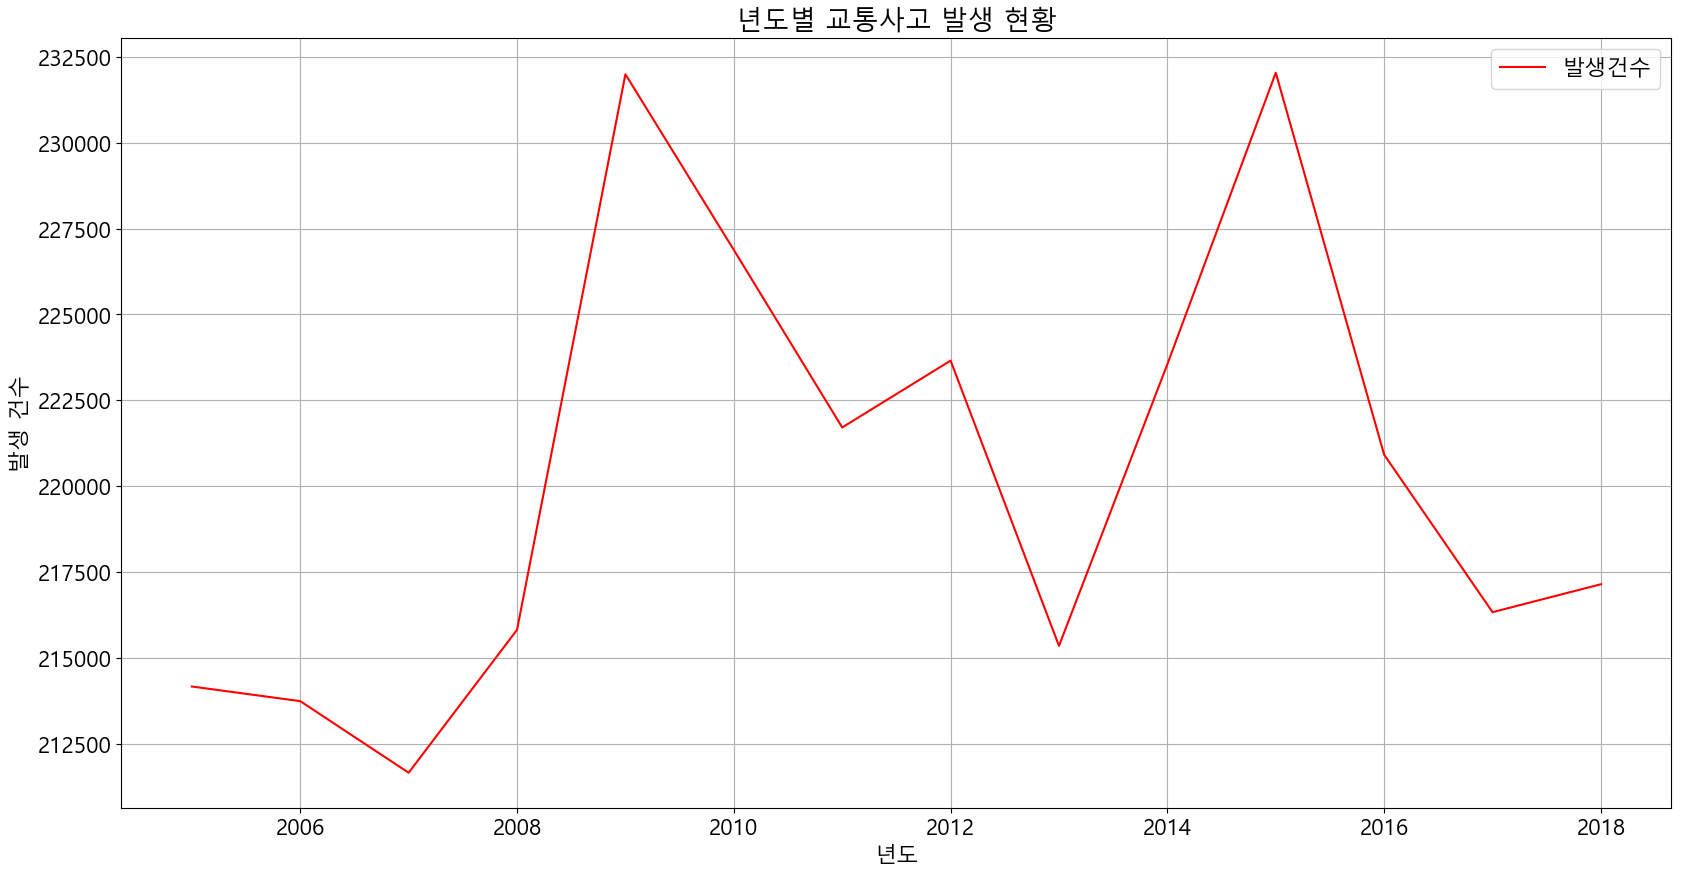

In [15]:
교통사고df['발생건수'].plot(color='#ff0000')
pyplot.grid()
pyplot.legend()  #범례
pyplot.title("년도별 교통사고 발생 현황")
pyplot.xlabel("년도")
pyplot.ylabel("발생 건수")
pyplot.show()

#### x축에 대한 텍스트 재지정

#### x좌표를 의미하는 리스트나 배열 생성

In [16]:
xpos = np.arange(len(교통사고df["발생건수"]))
xpos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

#### x좌표에 적용할 텍스트의 리스트 생성

In [17]:
xtext = list(교통사고df.index)
for i,v in enumerate(xtext):
    xtext[i] = "%d년" %v
    
xtext

['2005년',
 '2006년',
 '2007년',
 '2008년',
 '2009년',
 '2010년',
 '2011년',
 '2012년',
 '2013년',
 '2014년',
 '2015년',
 '2016년',
 '2017년',
 '2018년']

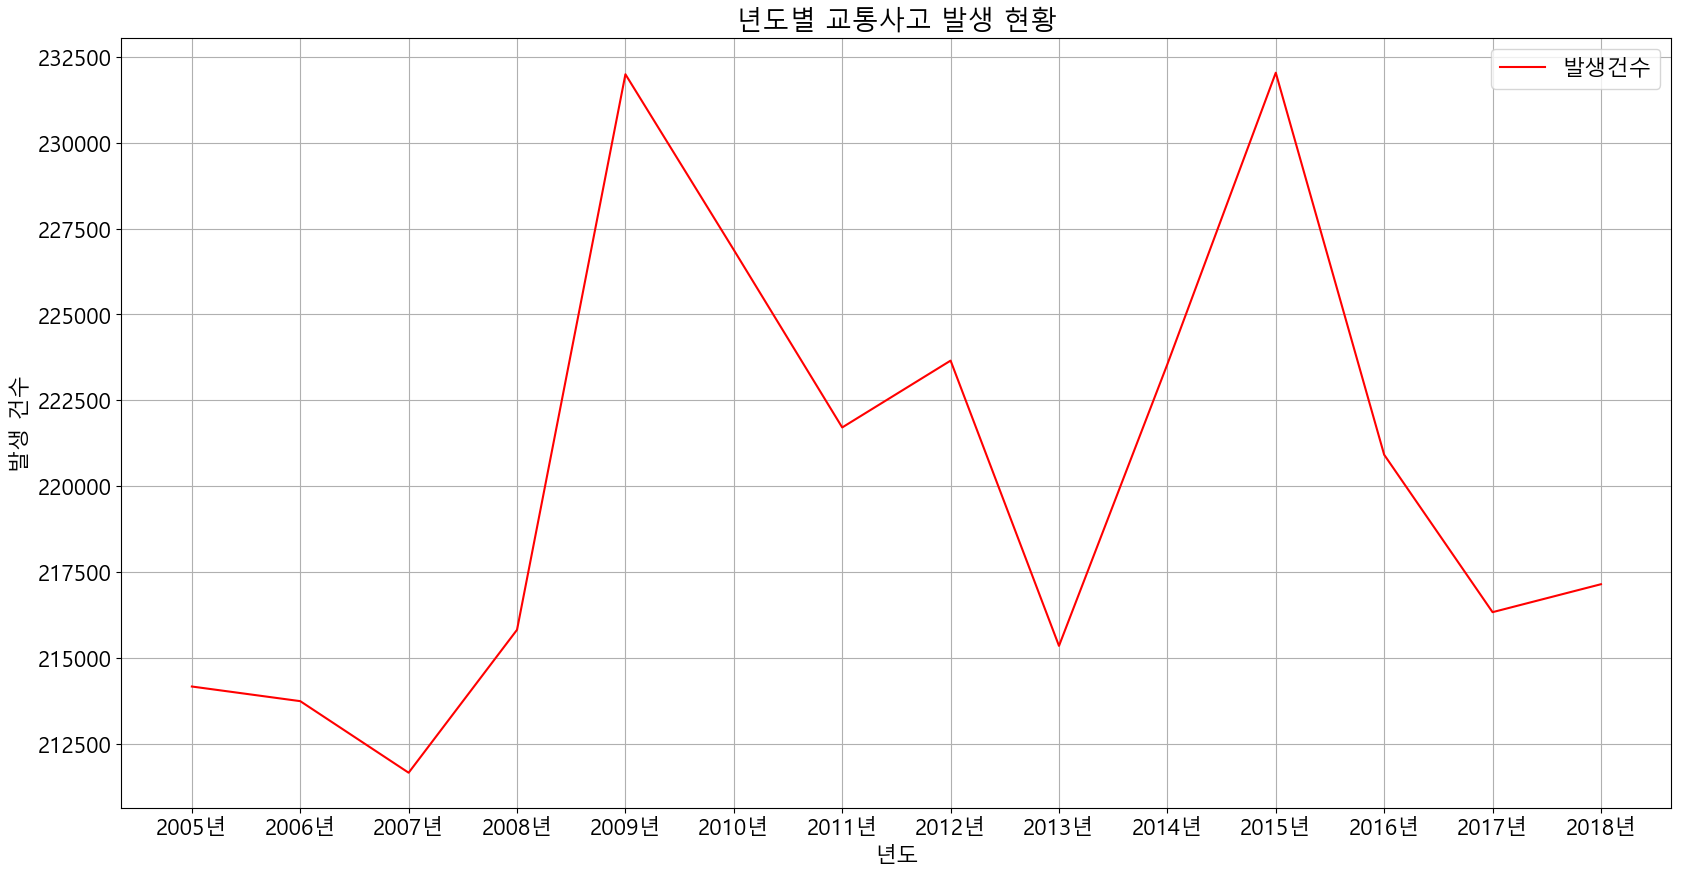

In [18]:
교통사고df['발생건수'].plot(color='#ff0000')
pyplot.grid()
pyplot.legend()  #범례
pyplot.title("년도별 교통사고 발생 현황")
pyplot.xlabel("년도")
pyplot.ylabel("발생 건수")
#  x축 tick 에 xtext 넣기 
pyplot.xticks(교통사고df.index, xtext)
pyplot.show()

### 2) 전체 ;컬럼에 대한 다중 선 그래프

> 컬럼 수 만큼 색상 값을 `리스트`로 만들면 각 컬럼에 대한 색상을 지정할 수 있다.

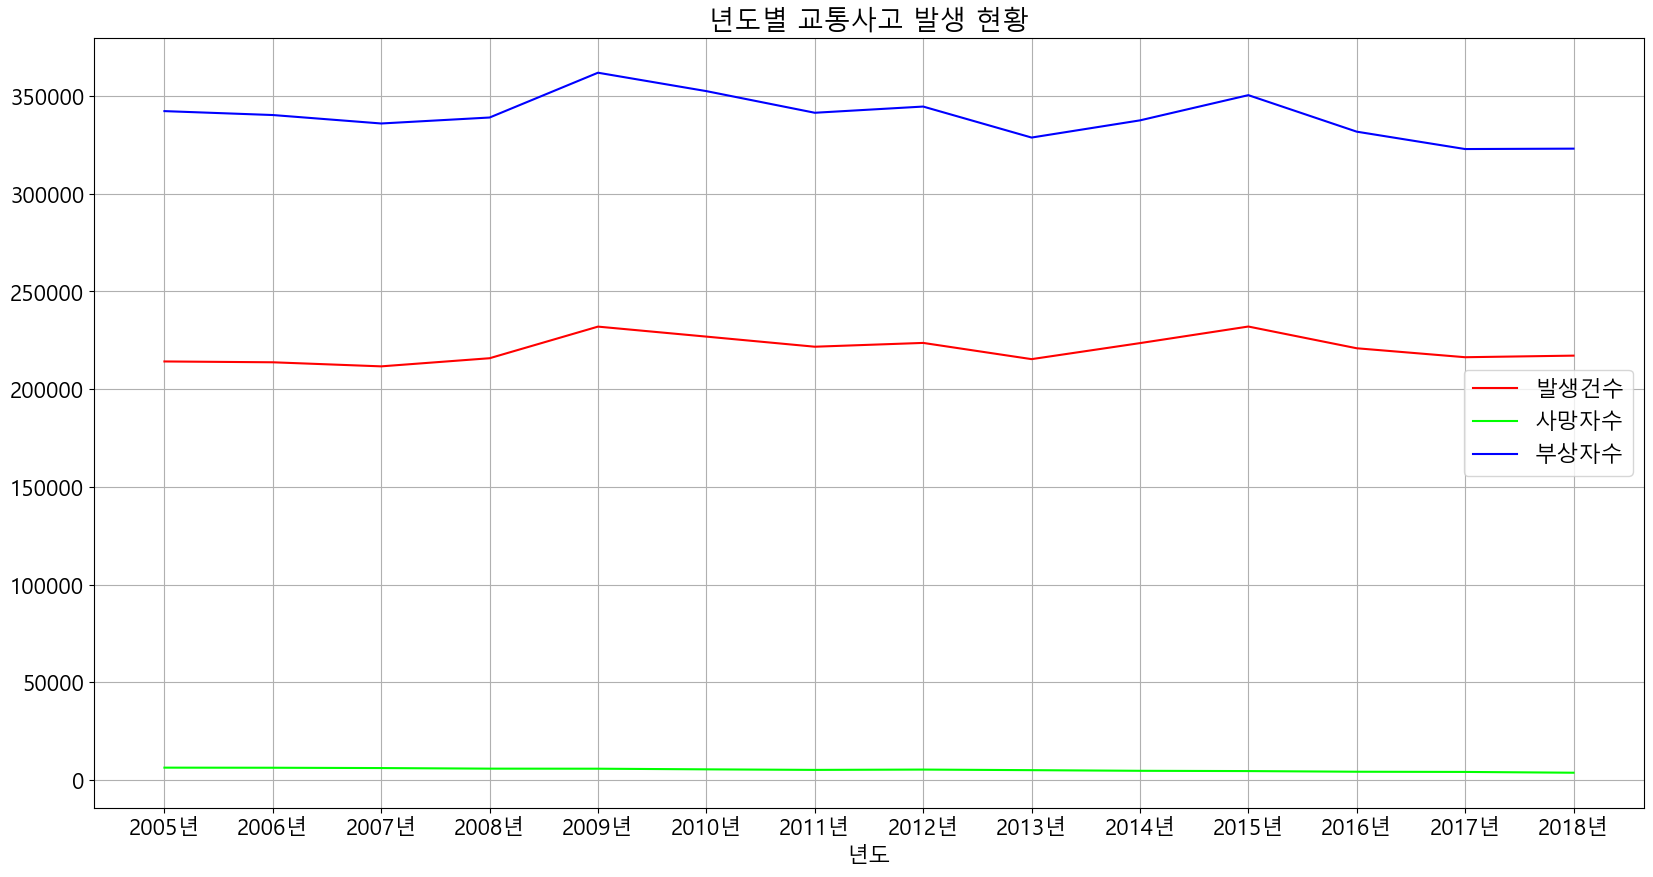

In [21]:
교통사고df.plot(color=['#ff0000','#00ff00','#0000ff'])
pyplot.grid()
pyplot.legend()  #범례
pyplot.title("년도별 교통사고 발생 현황")
pyplot.xlabel("년도")
pyplot.xticks(교통사고df.index, xtext)
pyplot.show()

## #04. 세로 막대 그래프
### 1) 특정 컬럼에 대한 시각화
#### 기본 옵션만 사용하기 

```python
데이터프레임객체['컬럼'].plot.bar()
````

* rot 파라미터는  x 축 텍스트의 각도, 기본값 90
* width 파라미터는 모든 막대가 공백없이 꽉 찬 상태를 1로 하여 비율적으로 지정, 기본값은 0.5

막대그래프는 index의 데이터 타입이 숫자, 문자열에 상관없이 x축이 0부터 시작되는 좌표계를 갖는다.

그러므로 `xticks()` 함수를 사용할 때 반드시 x 축 좌표에 대한 지정이 이루어져야 한다.

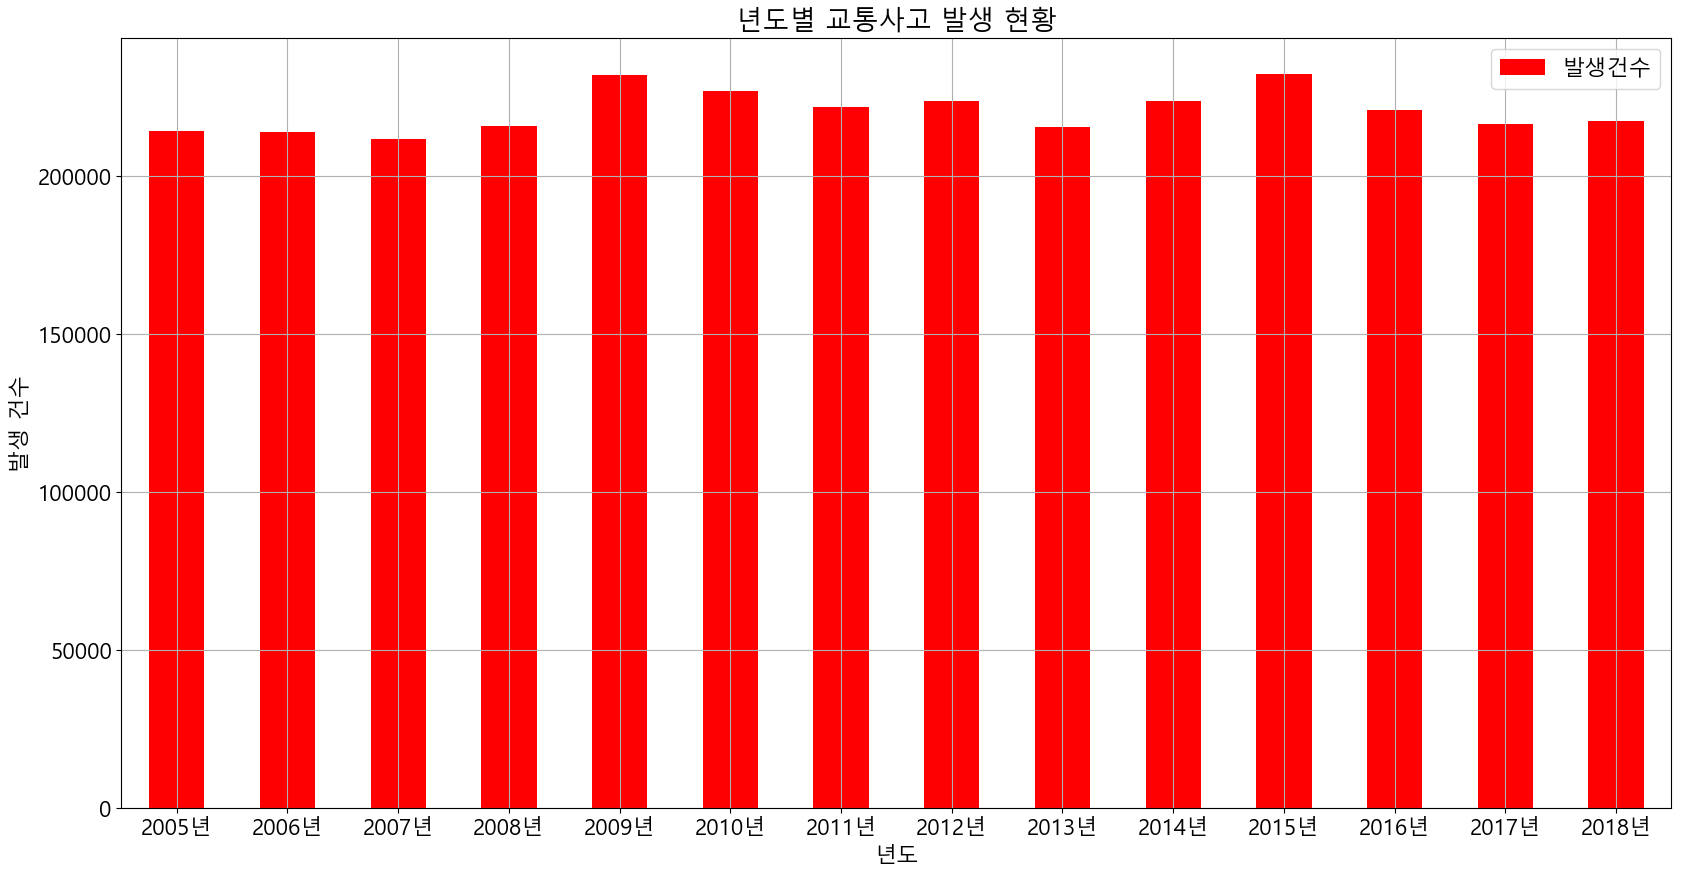

In [30]:
xpos = np.arange(len(교통사고df['발생건수']))

교통사고df['발생건수'].plot.bar(color='#ff0000',rot=0)
pyplot.grid()
pyplot.legend()  #범례
pyplot.title("년도별 교통사고 발생 현황")
pyplot.xlabel("년도")
pyplot.ylabel("발생 건수")
#  x축 tick 에 xtext 넣기 
pyplot.xticks(xpos, xtext)
pyplot.show()

#### 텍스트 출력 처리, Y축 범위 지정

> 텍스트 출력은 그래프의 x,y 좌표를 구해서 모든 문자열을 개별적으로 출력해야한다.

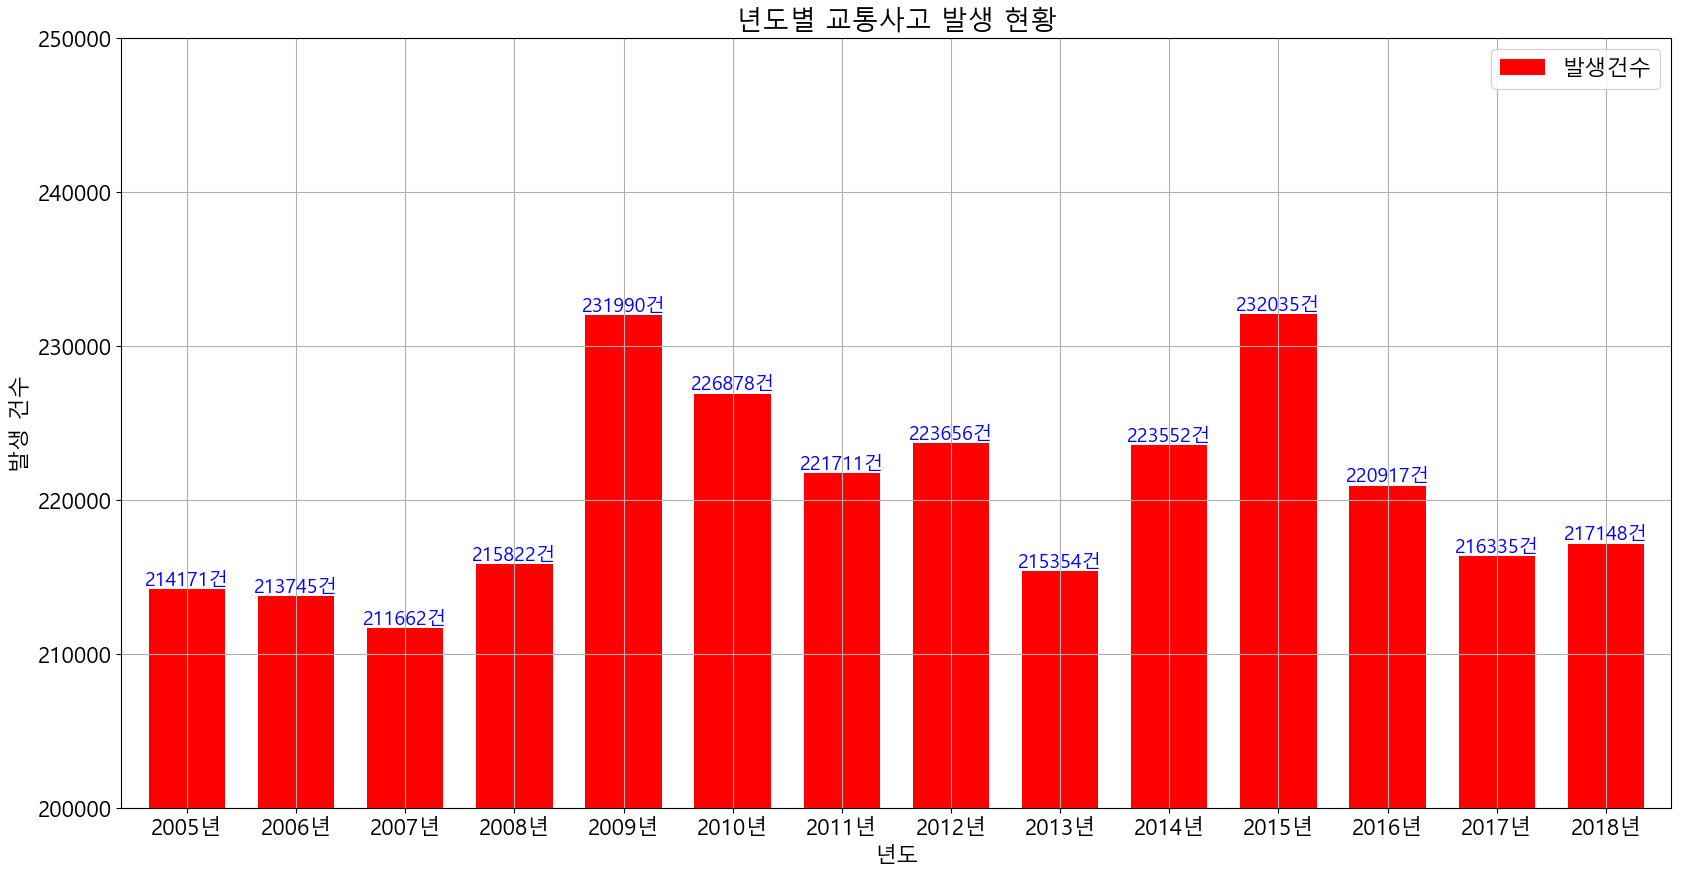

In [38]:
교통사고df['발생건수'].plot.bar(color='#ff0000',rot=0, width=0.7)
pyplot.grid()
pyplot.legend()  #범례
pyplot.title("년도별 교통사고 발생 현황")
pyplot.xlabel("년도")
pyplot.ylabel("발생 건수")
#  x축 tick 에 xtext 넣기 
pyplot.xticks(xpos, xtext)

# y축의 범위 설정 / x축의 범위를 설정할 경우 xlim(min, max) 사용
pyplot.ylim(200000, 250000)

# 그래프에 텍스트 표시하기
# 그래프에 표시되는 실 데이터는 y축 좌표를 의미하고, x축은 0부터 시작하는 좌표값을 갖는다.
for i, v in enumerate(list(교통사고df['발생건수'])):
    txt = "%d건" %v
    pyplot.text(i,v,txt, fontsize=14, color="#0000ff", 
               horizontalalignment='center', verticalalignment='bottom')
pyplot.show()

### 2) 전체 컬러에 대한 시각화

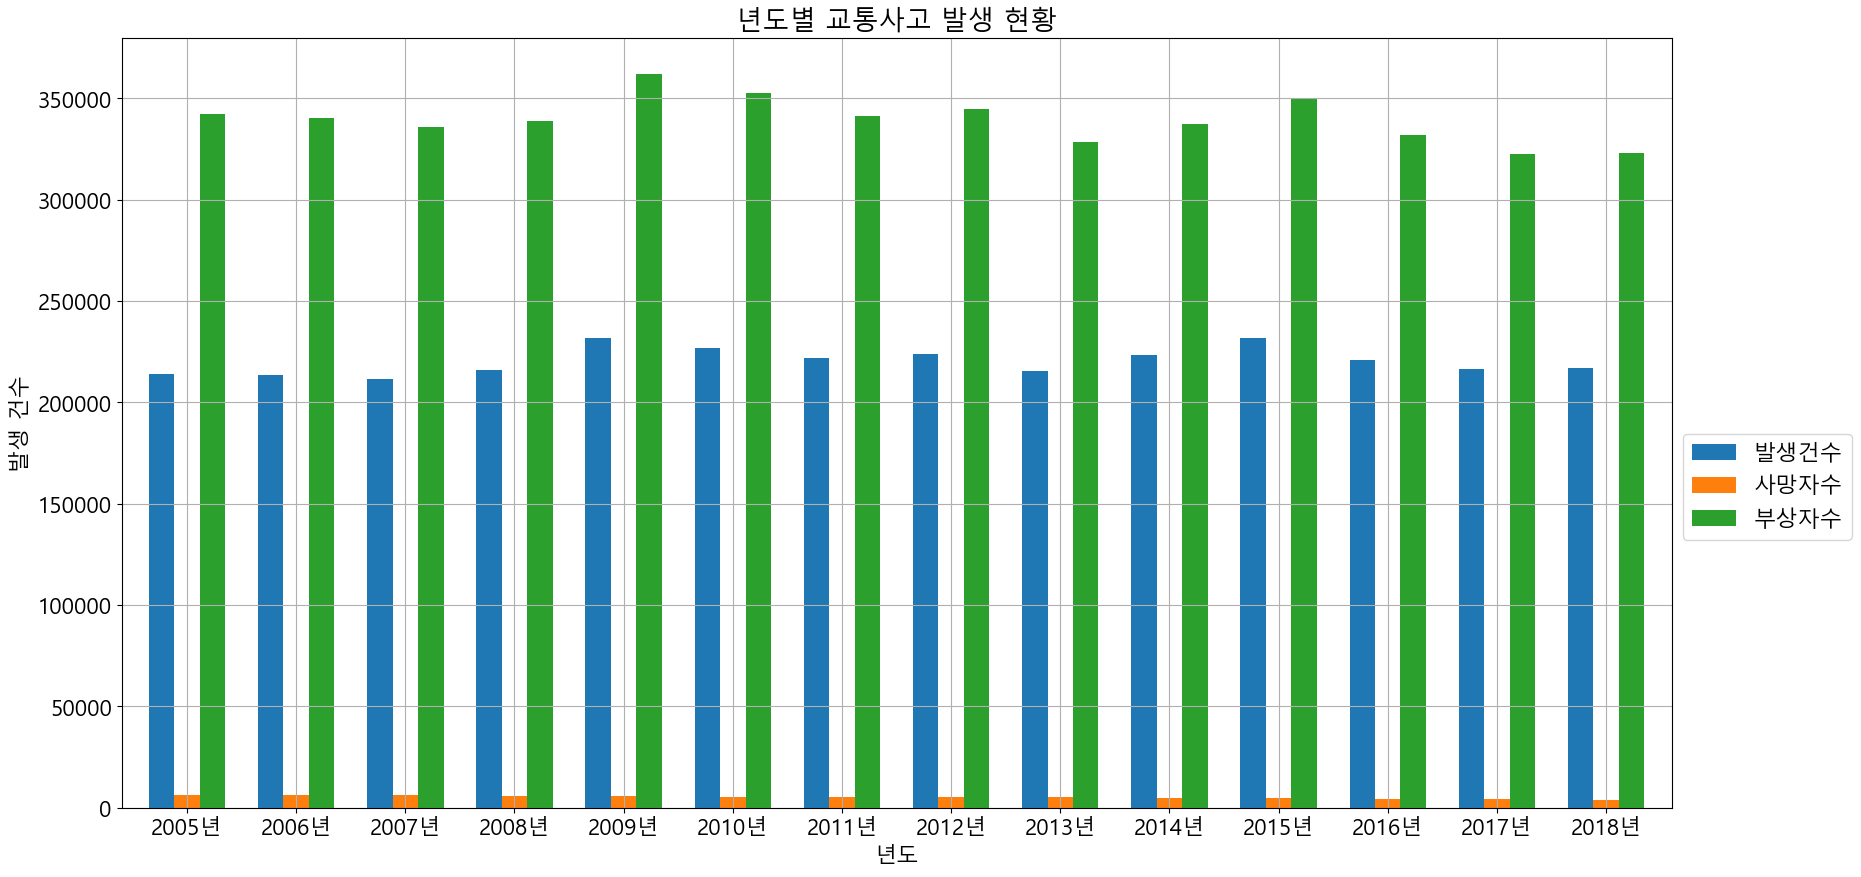

In [43]:
교통사고df.plot.bar(rot=0, width=0.7)
pyplot.grid()
# pyplot.legend()  #범례

# 벙례 위치 변경(그래프 밖 좌측하단)
# pyplot.legend(bbox_to_anchor=(0,0))

# 벙례 위치 변경(그래프 밖 우측상단)
# pyplot.legend(bbox_to_anchor=(1,1))

pyplot.legend(bbox_to_anchor=(1,0.5))
pyplot.title("년도별 교통사고 발생 현황")
pyplot.xlabel("년도")
pyplot.ylabel("발생 건수")
#  x축 tick 에 xtext 넣기 
pyplot.xticks(xpos, xtext)
pyplot.show()

## #5. 가로 막대 그래프

### 1) 특정 컬럼에 대한 시각화

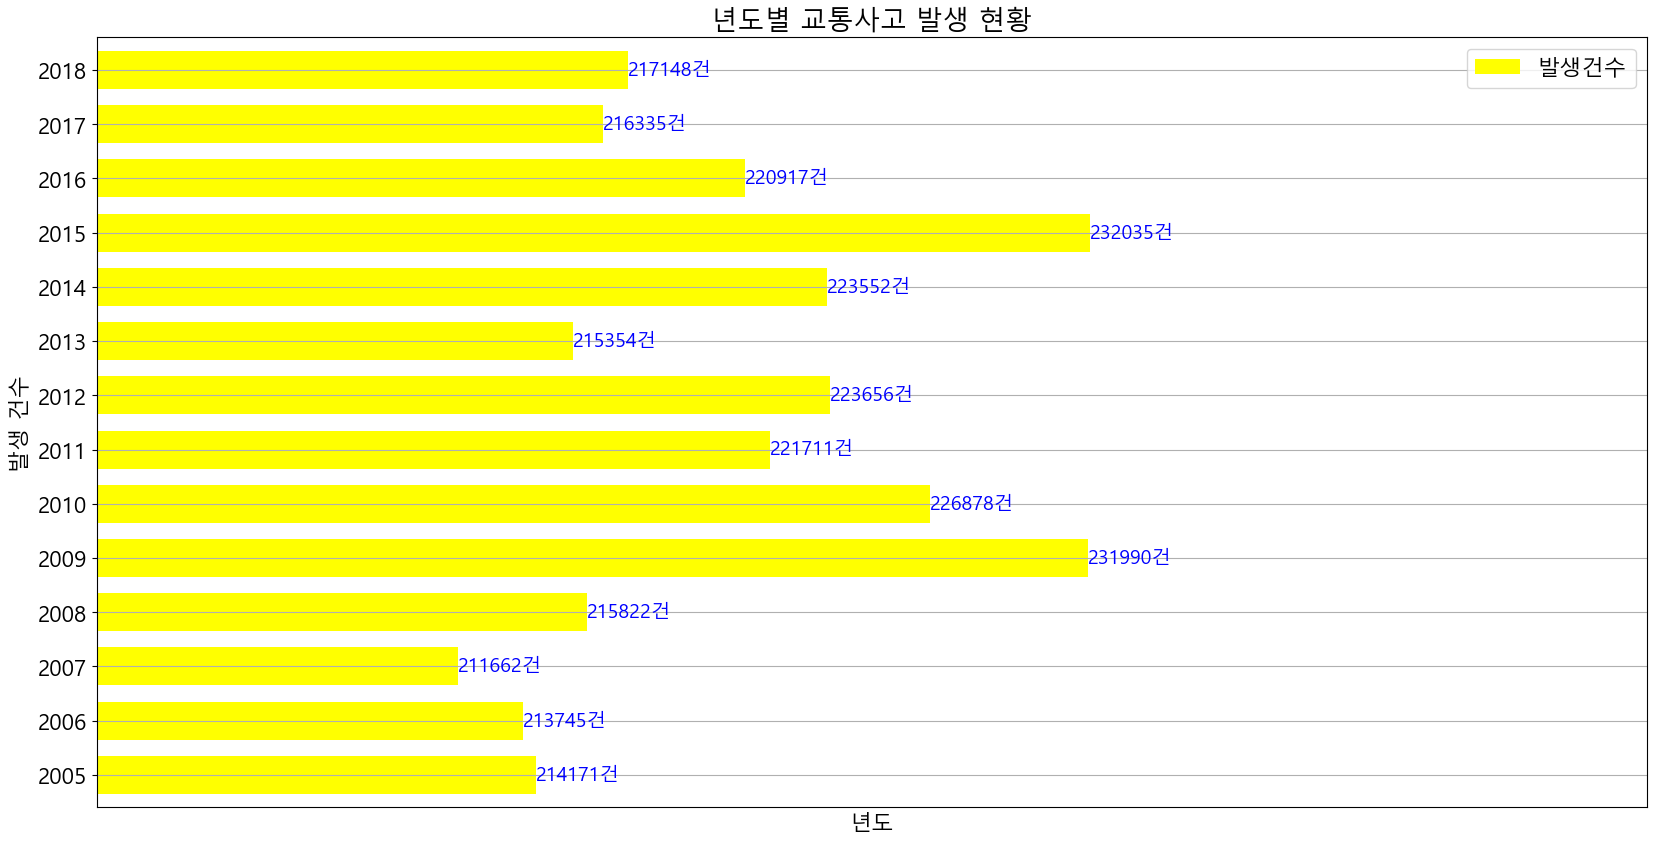

In [49]:
교통사고df['발생건수'].plot.barh(color='#ffff00',rot=0, width=0.7)
pyplot.grid()
pyplot.legend()  #범례
pyplot.title("년도별 교통사고 발생 현황")
pyplot.xlabel("년도")
pyplot.ylabel("발생 건수")
#  x축 tick 에 xtext 넣기 
pyplot.xticks(xpos, xtext)

# ylim 을 xlim으로 변경하면 가로 막대
pyplot.xlim(200000, 250000)

# 그래프에 텍스트 표시하기
# i, v => v, i // 
for i, v in enumerate(list(교통사고df['발생건수'])):
    txt = "%d건" %v
    pyplot.text( v, i,txt, fontsize=14, color="#0000ff", 
               horizontalalignment='left', verticalalignment='center')
pyplot.show()

### 2) 전체 컬럼에 대한 시각화

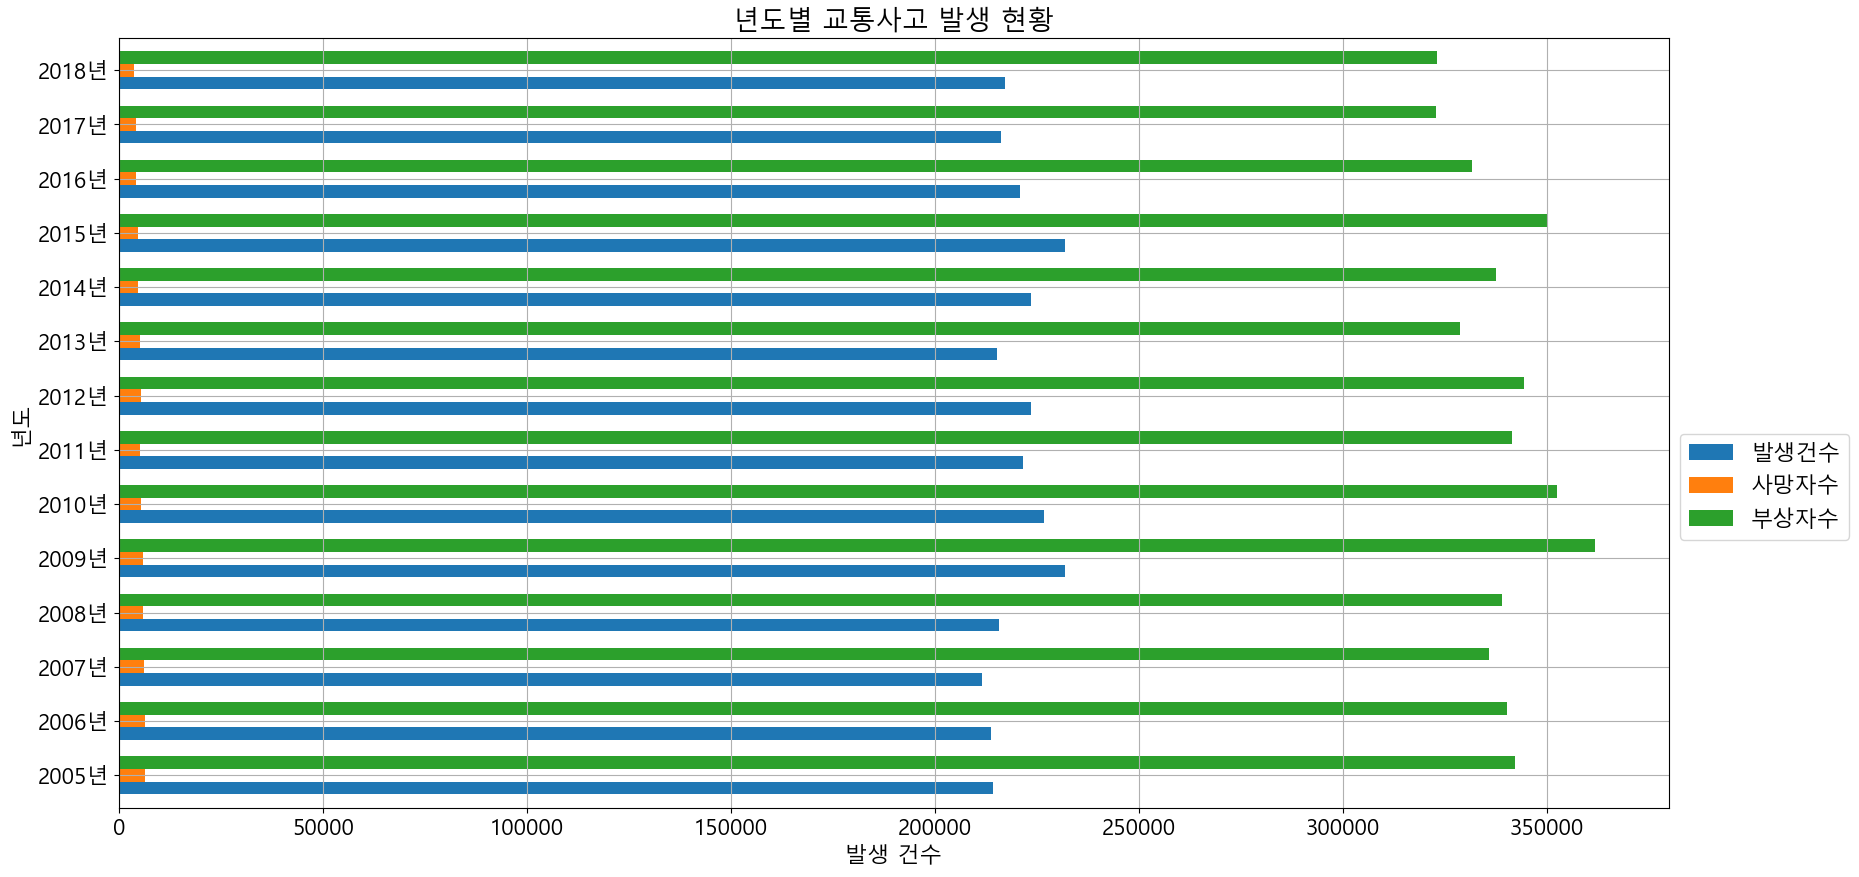

In [51]:
교통사고df.plot.barh(rot=0, width=0.7)
pyplot.grid()
pyplot.legend(bbox_to_anchor=(1,0.5))
pyplot.title("년도별 교통사고 발생 현황")
pyplot.ylabel("년도")
pyplot.xlabel("발생 건수")
#  x축 tick 에 xtext 넣기 
pyplot.yticks(xpos, xtext)
pyplot.show()

## #06.파이 그래프

데이터프레임의 특정 컬럼을 지정하여 전체를 기준으로 어느 정도의 비율을 차지하는지를 시각화하는 그래프

### 1) 파이 그래프 기본형

In [53]:
# 각 컬럼별로 평균 구하기 
교통사고평균 = 교통사고df.mean()
교통사고평균

발생건수    220355.428571
사망자수      5245.428571
부상자수    339415.214286
dtype: float64

In [54]:
# 구해진 결과를 가지고 데이터프레임 생성
교통사고평균df = DataFrame(교통사고평균, columns=["교통사고"])
교통사고평균df

,교통사고
발생건수,220355.428571
사망자수,5245.428571
부상자수,339415.214286


#### 파이크 그래프 표시 -> 반드시 특정 컬럼을 지정해야 한다.

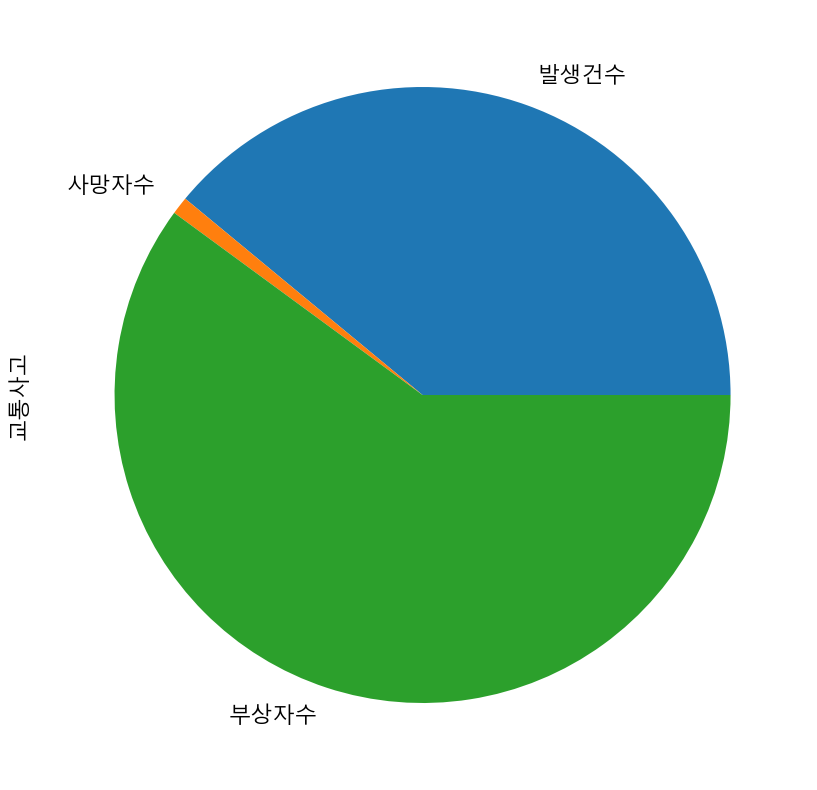

In [55]:
교통사고평균df['교통사고'].plot.pie()
pyplot.show()

### 1) 파이 그래프의 옵션

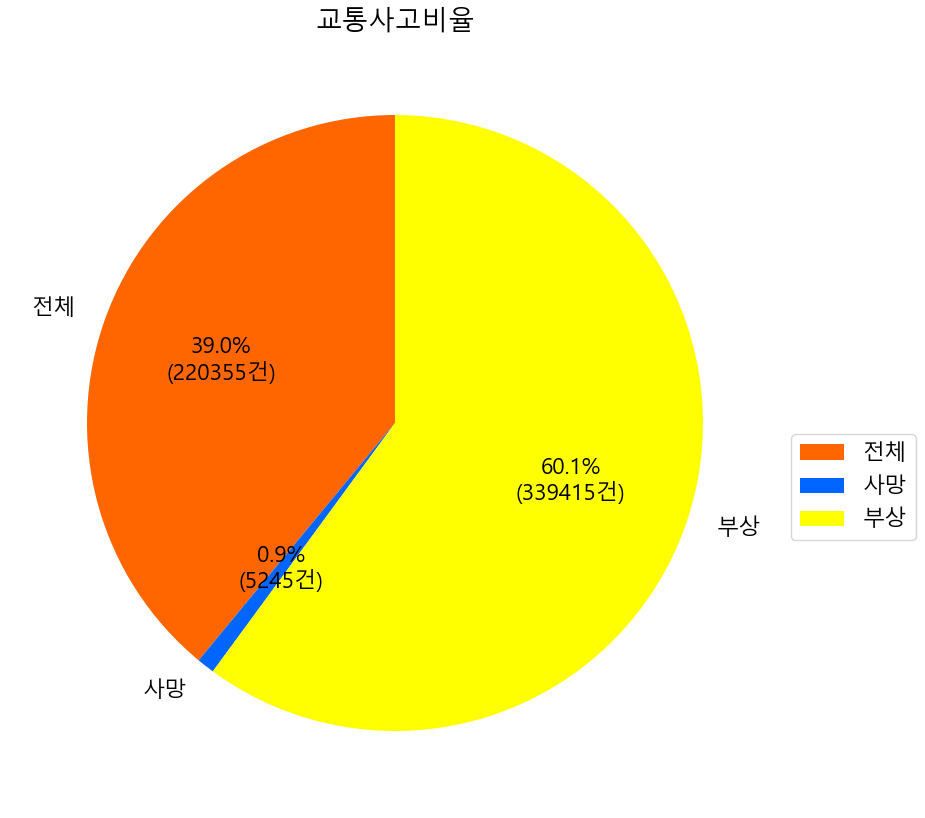

In [101]:
# 4. 건수를 리턴하는 함수 만들기
# 비율는 교통사고 컬럼간의 비율이 들어온다.
def make_autopct(비율):
    per = '%0.1f%%' %비율
    total = 교통사고평균df['교통사고'].sum() 
    cnt = int(total*비율/100)
    str = "{}\n({}건)".format(per, cnt)
    return str

교통사고평균df['교통사고'].plot.pie(labels=['전체','사망','부상'],
                                    colors=["#ff6600","#0066ff", "#ffff00"],
                                    # autopct='%0.1f%%', startangle=90)
                                    autopct = make_autopct, startangle=90)
# 1.타이틀
pyplot.title("교통사고비율")
# 2. y 레이블 표시 안함
pyplot.ylabel(None)
# 3. 범주
pyplot.legend(bbox_to_anchor=(1,0.5))
pyplot.show()

## #07. 산점도 그래프 

- 두 변수간의 영향력을 보여주기 위해서 가로축과 세로축에 대한 `데이터 포인트`를 그리는데 사용
- `데이터 포인트`들이 뭉쳐 있을 수록 두 변수간의 관련성 정도가 높다고 해석한다.

### 1) 교통사고 발생건수와 부상자 수간의 상관관계

- 첫번째 변수 : 발생건 수
- 두번째 변수 : 부상자 수

In [104]:
교통사고csv

,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808
...,...,...,...,...,...
163,2018,8,18335,357,27749
164,2018,9,18371,348,27751
165,2018,10,19738,373,28836
166,2018,11,19029,298,28000


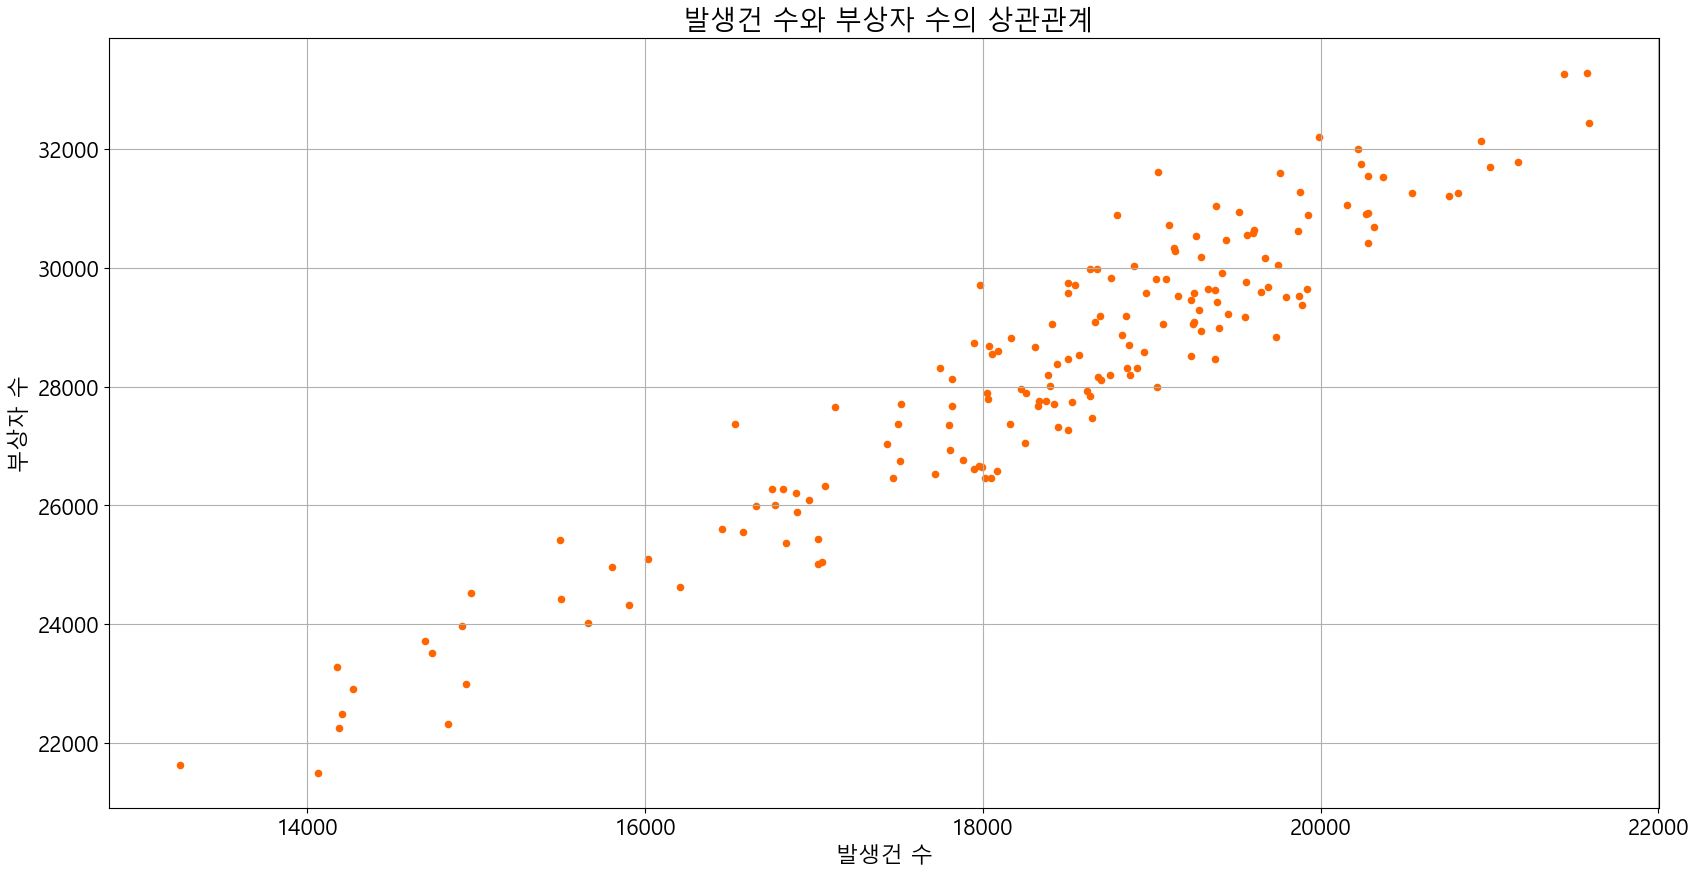

In [107]:
# marker -> o, v, ^, < >, 8, s, p, *, h ,H, D, d, P, X
교통사고csv.plot.scatter(x='발생건수', y='부상자수', marker='o', color="#ff6600")
pyplot.grid()
pyplot.title(" 발생건 수와 부상자 수의 상관관계")
pyplot.ylabel("부상자 수")
pyplot.xlabel("발생건 수")
pyplot.show()

### 산점도 그래프 해석

점들이 많이 모여 있을 수록 두 변수간의 관계성이 높고, 점들이 흩어져 있을 수록 두 변수간의 관계성이 적다고 해석

### - 정의 관계 : x가 증가 할 때 y도 증가하는 직선에 가까운 형태
### - 역의 관계 : x가 증가 할 때 y는 감소하는 형태
### - 선형 관계 : 점들이 직선에 가깝게 배치된 형태
### - 비선형 관계 : 점들이 직선이 아닌 형태로 배치된 형태

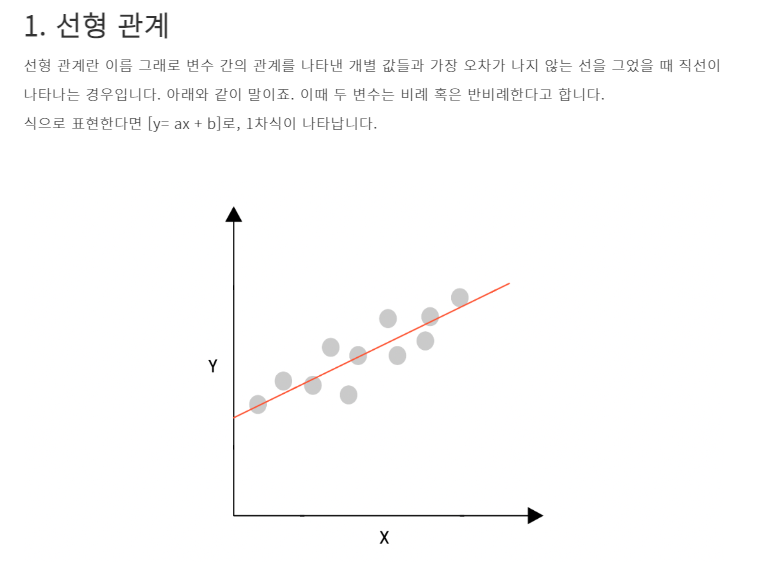

In [2]:
from IPython.display import Image
Image("linear.png")

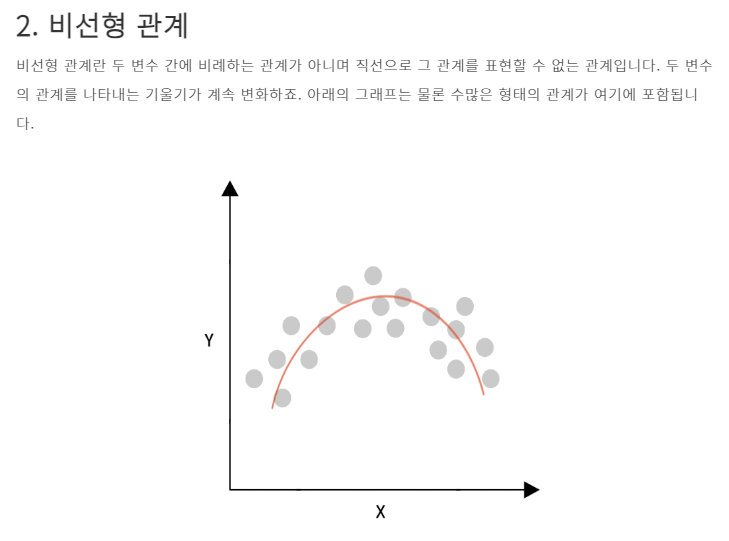

In [1]:
from IPython.display import Image
Image("non_linear.png")

### 상관분석

연속형 변수로 측정된 두 변수간의 선형적 관계를 분석하는 관계

연속형 변수는 산술 평균을 계산할 수 있는 숫자형의 데이터이며, 선형적 관계라 함은 흔히 비례식이 성립되는 관계를 말한다.

> 예를들어 A변수가 증가함에 따라 B변수도 증가되는지 혹은 감소하는지를 분석하는 것이다.

상관분석은 두 변수간의 선형적 관계에 초점을 두고 있으며 **선형관계를 갖는가? 어느방향으로 형성되어 있는가? 그 관계의 정도는 얼마나 큰가?**와 

같은 질문을 던지며 결과 해석을 수행한다.

### 상관계수

상관분석에서 두 변수 사이의 선형적인 관계정도를 나타내기 위해 사용되는 값.

> 수하적인 공식에 의해 구해야 한다.

상관분석에는 측정 데이터에 따라 피어슨 상관분석, 상곤분석 등의 여러가지 분석방법이 있지만, 일반적으로 **피어슨 상관계수**를 의미한다.

| 상관계수 | 설명 |
| -------- | ---- |
|  1  | 직선형 정의 관계 |
|  -1 | 직선형 역의 관계 |
|  0  | 모든 점들이 분산되어 있는 형태 |

> 상관계수 1과 0 사이에 소수점 형태로 점의 분포도를 표현한다.

### 추세선

차트 위에 그려진 대각선들.

이는 특정 데이터 지점을 연결하며 분석가가 보다 쉽게 데이터의 움직임을 시각화 하고 추세를 알 수 있게 한다.

추세선을 기술적 분석의 가장 기초적인 도구 중 하나로 간주된다.

#### 추세선을 포함한 산점도 그래프

In [110]:
# 추세선 
x = 교통사고csv["발생건수"]
y = 교통사고csv["부상자수"]

# x,y를 기반으로 추세선을 위한 계산 -
z = np.polyfit(x,y,1) #   (x, y, 1차원)
f = np.poly1d(z)     

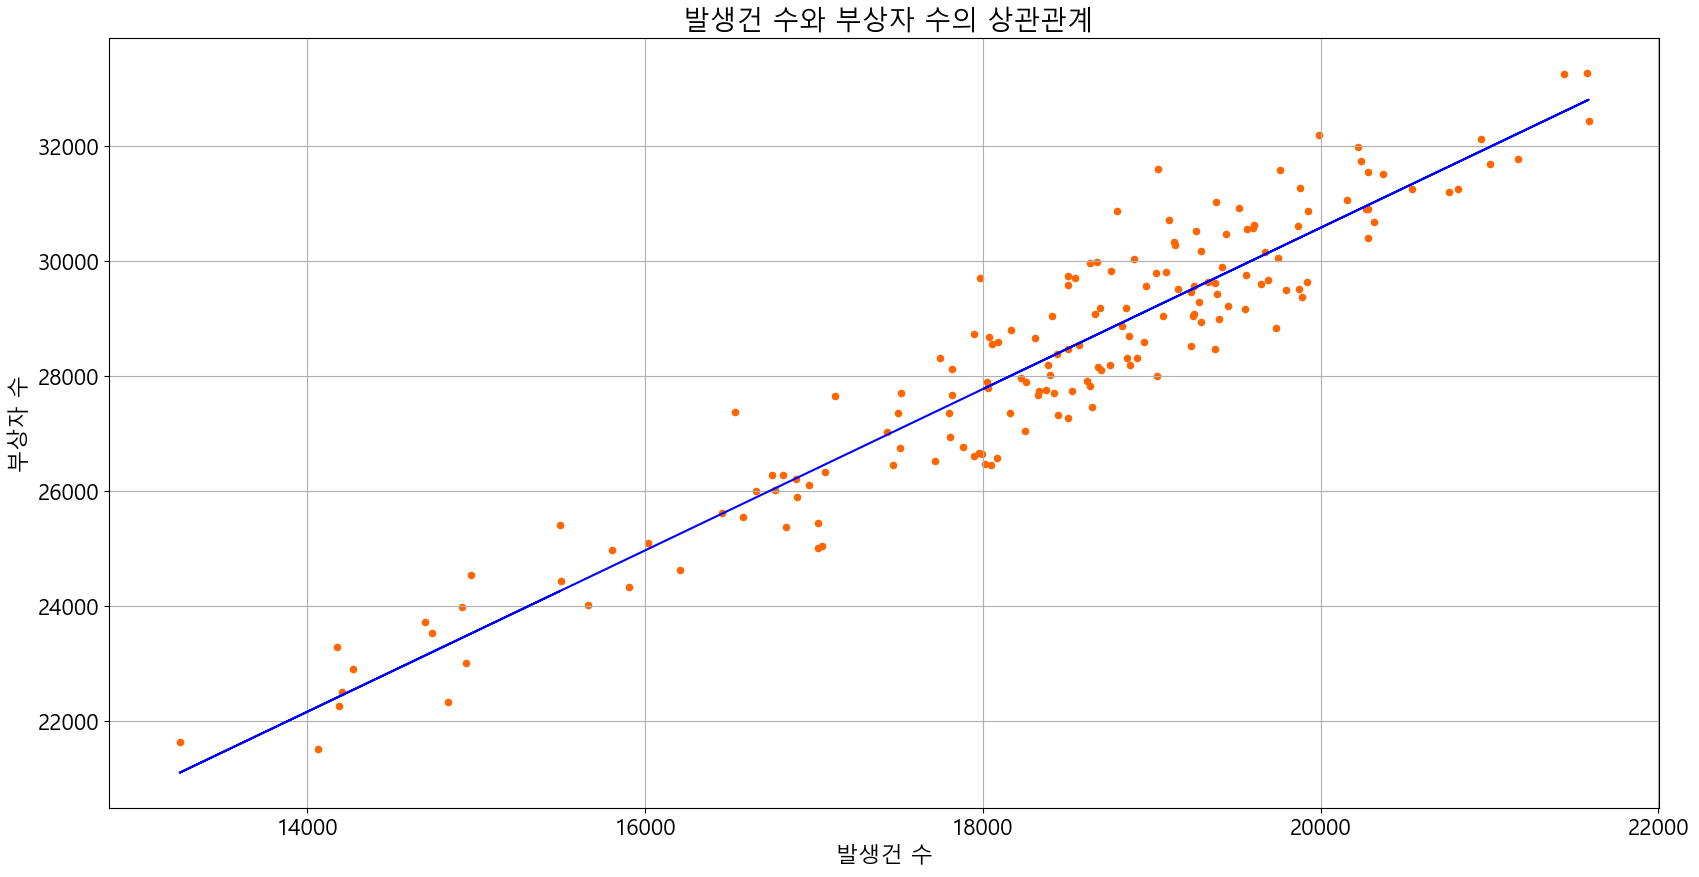

In [111]:
# 산점도 그래프 
교통사고csv.plot.scatter(x='발생건수', y='부상자수', marker='o', color="#ff6600")
pyplot.grid()
pyplot.title(" 발생건 수와 부상자 수의 상관관계")
pyplot.ylabel("부상자 수")
pyplot.xlabel("발생건 수")
# 추세선 추가 
pyplot.plot(x,f(x),'#0000ff')
pyplot.show()